
Descriptive Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+

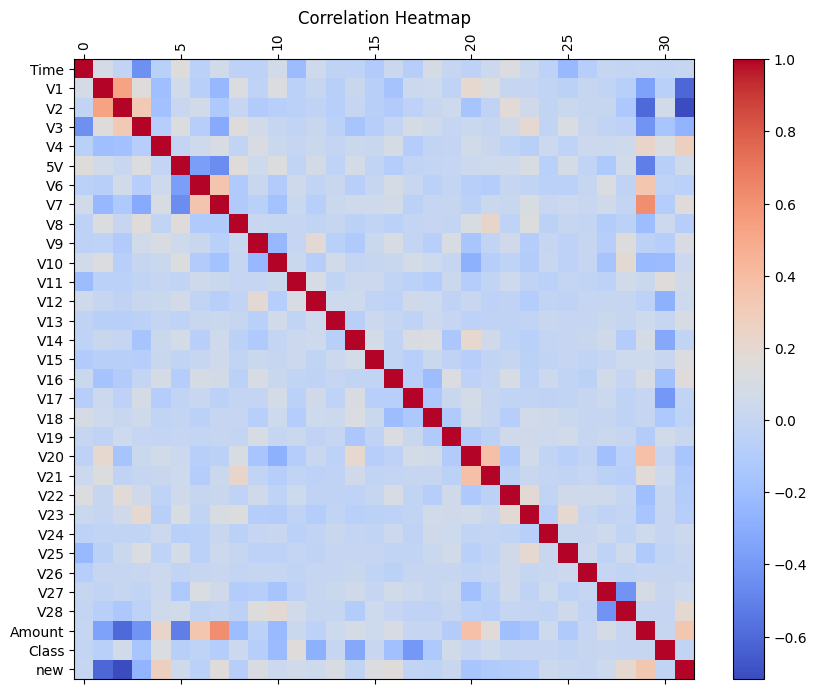

Total number of rows: 56508


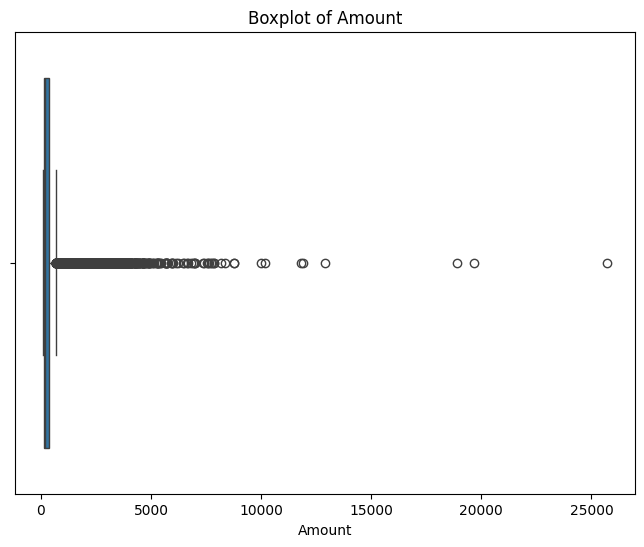

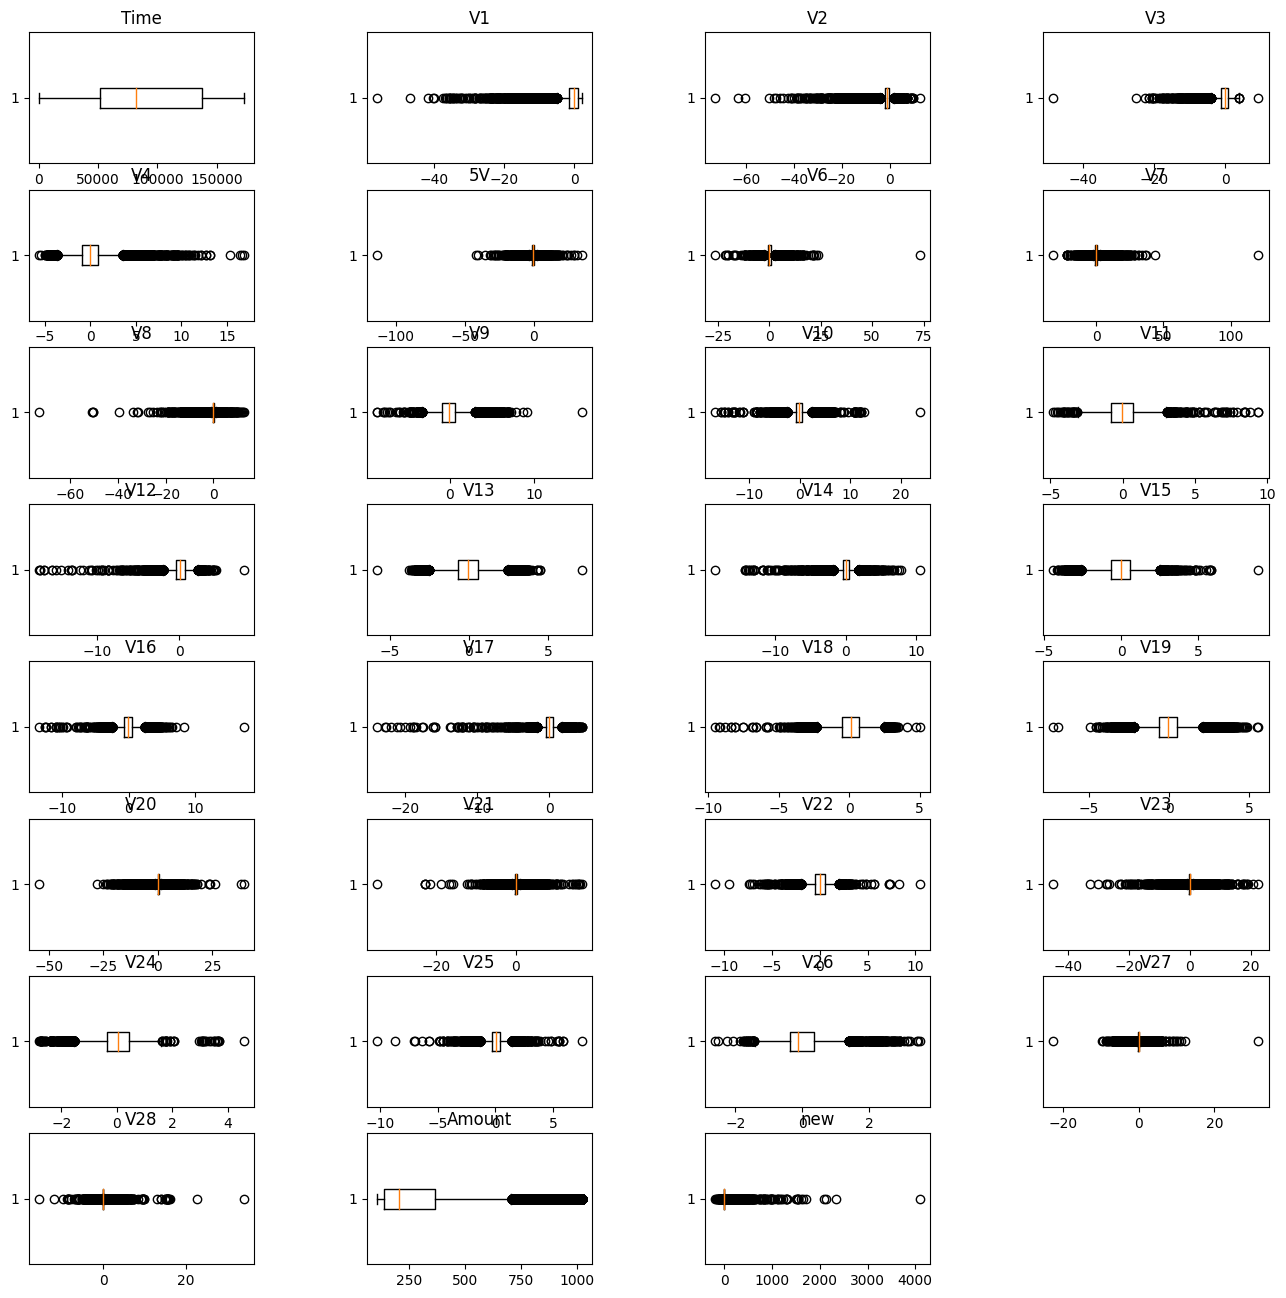

C:\Users\Divya Shree\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\Divya Shree\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


filtered_df:
             Time        V1        V2        V3        V4        5V        V6  \
0        29725.45 -1.359807 -0.072781  1.962452  1.378155 -0.338321  0.462388   
2        29725.45 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3        29725.45 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
12       29725.45  1.249999 -1.221637  0.383930 -1.234899 -1.485419 -0.753230   
20       29725.45  0.694885 -1.361819  1.029221  0.834159 -1.191209  1.309109   
...           ...       ...       ...       ...       ...       ...       ...   
284753  162232.80  1.465737 -0.618047 -2.851391  1.425282  0.893893 -0.958325   
284754  162232.80  1.847499 -1.900613 -0.846258 -1.559943 -1.391654 -0.050767   
284757  162232.80 -1.757643 -0.982659  1.091540 -1.409539 -0.662159  0.046930   
284771  162232.80  1.847499 -0.427906 -2.184267  0.159979  0.587740 -0.557966   
284806  162232.80 -0.533413 -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              

C:\Users\Divya Shree\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\Divya Shree\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress numpy warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

df = pd.read_csv("C:\\Users\\Divya Shree\\Downloads\\creditcard (1).csv")
df.corr()

# 1. Filter the data based on some logic
# Example: Filtering rows where 'Amount' is greater than 100
filtered_df = df[df['Amount'] > 100].copy()

descriptive_stats = df.describe()
print("\nDescriptive Statistics:")
print(descriptive_stats)

# 2. Rename the columns if required and create a new column related to other attributes
# Example: Renaming 'Old_Column' to 'New_Column' and creating a new column 'New_Related_Column'
filtered_df.rename(columns={'V5': '5V'}, inplace=True)
filtered_df['new'] = filtered_df['V1'] * filtered_df['V2']

# 3. Show the relationship between the variables using correlation
correlation_matrix = filtered_df.corr()

# a. Represent the association in visual form
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(rotation='vertical')  # Specify rotation here
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

# 4. Count the total number of rows in the dataset
row_count = len(filtered_df)
print(f"Total number of rows: {row_count}")

# 5. Detect outliers
# a. Represent the outliers in visual form (using a boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x=filtered_df['Amount'])
plt.title('Boxplot of Amount')
plt.show()

# b. Apply different methods to handle outliers (e.g., winsorization)
from scipy.stats.mstats import winsorize
filtered_df['Amount'] = winsorize(filtered_df['Amount'], limits=[0.05, 0.05])

# 5. Detect outliers for all attributes
# a. Represent the outliers in visual form (using boxplots)
num_cols = filtered_df.select_dtypes(include=[np.number]).columns
num_cols = num_cols[num_cols != 'Class']  # Exclude the 'Class' column
n_cols = len(num_cols)
n_rows = n_cols // 4 + (n_cols % 4 > 0)

plt.figure(figsize=(16, 16))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, 4, i + 1)
    plt.boxplot(filtered_df[col], vert=False)
    plt.title(col)
plt.subplots_adjust(wspace=0.5)
plt.show()

# b. Apply different methods to handle outliers (e.g., clipping)
for col in num_cols:
    lower_bound = filtered_df[col].quantile(0.01)
    upper_bound = filtered_df[col].quantile(0.99)
    filtered_df[col] = np.clip(filtered_df[col], lower_bound, upper_bound)

for column in filtered_df.columns:
    if column not in ['5V', 'new']:
        filtered_df[column] = handle_outliers(filtered_df[column])
threshold = 1000
filtered_df['Amount'] = np.where(filtered_df['Amount'] > threshold, threshold, filtered_df['Amount'])

# 6. No categorical data mentioned, but if present, you can convert it to numerical using one-hot encoding or label encoding.

# 7. Drop irrelevant columns
# Example: Dropping 'Irrelevant_Column'
filtered_df = filtered_df.drop(columns=['Class'])

# Print the resulting DataFrame
print('filtered_df:')
print(filtered_df)


In [5]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,3.777823e-12,-2.118614e-12,-1.733159e-13,-3.473231e-12,-1.306165e-13,-1.116494e-13,2.114527e-12,3.016285e-14,...,-3.276238e-12,2.281863e-12,-2.969746e-12,-1.029876e-12,1.144179e-12,1.835263e-12,7.624804e-12,-9.769215e-13,-0.227709,-0.101347
V2,-0.010593,3.777823e-12,1.000000e+00,2.325661e-12,-2.314981e-12,-1.831952e-12,9.438444e-13,5.403436e-12,2.133785e-14,3.238513e-13,...,2.280202e-12,-2.548560e-13,-4.856120e-12,6.431308e-13,-9.423730e-13,-4.129100e-13,-9.856545e-13,2.525513e-12,-0.531409,0.091289
V3,-0.419618,-2.118614e-12,2.325661e-12,1.000000e+00,2.046235e-13,-4.032993e-12,-1.574471e-13,3.405586e-12,-1.272385e-12,-6.812351e-13,...,6.736294e-13,-8.909339e-13,4.147209e-12,3.407636e-12,5.712956e-13,-2.577274e-12,-5.041444e-12,5.189109e-12,-0.210880,-0.192961
V4,-0.105260,-1.733159e-13,-2.314981e-12,2.046235e-13,1.000000e+00,-2.552389e-13,1.084041e-12,8.135064e-13,7.334818e-13,-7.143069e-13,...,-2.696370e-12,4.347776e-13,-4.160969e-12,-2.368743e-12,1.619944e-12,-3.043100e-13,-1.456066e-12,-2.832372e-12,0.098732,0.133447
V5,0.173072,-3.473231e-12,-1.831952e-12,-4.032993e-12,-2.552389e-13,1.000000e+00,-6.934789e-14,1.573956e-11,-2.038243e-12,-1.000756e-12,...,-1.751796e-12,7.095269e-13,3.616075e-12,-2.808776e-13,1.451126e-12,-1.896141e-13,-2.124559e-12,1.010196e-11,-0.386356,-0.094974
V6,-0.063016,-1.306165e-13,9.438444e-13,-1.574471e-13,1.084041e-12,-6.934789e-14,1.000000e+00,-2.798968e-12,-5.446480e-13,2.036743e-12,...,1.476858e-12,-1.144797e-12,-1.527842e-12,1.551854e-12,-2.723707e-12,3.351239e-12,1.481307e-12,-6.069227e-13,0.215981,-0.043643
V7,0.084714,-1.116494e-13,5.403436e-12,3.405586e-12,8.135064e-13,1.573956e-11,-2.798968e-12,1.000000e+00,5.528803e-12,5.088082e-13,...,2.788246e-12,-8.133209e-13,-4.293094e-12,-2.553518e-12,-7.406970e-13,-4.476467e-12,-1.328637e-11,2.958679e-13,0.397311,-0.187257
V8,-0.036949,2.114527e-12,2.133785e-14,-1.272385e-12,7.334818e-13,-2.038243e-12,-5.446480e-13,5.528803e-12,1.000000e+00,-2.243172e-12,...,-4.022440e-12,-2.679560e-12,9.013064e-13,-1.074365e-12,-3.268979e-12,1.043839e-12,-3.499804e-12,1.866598e-12,-0.103079,0.019875
V9,-0.008660,3.016285e-14,3.238513e-13,-6.812351e-13,-7.143069e-13,-1.000756e-12,2.036743e-12,5.088082e-13,-2.243172e-12,1.000000e+00,...,3.040326e-12,-7.467526e-13,-1.011003e-12,8.579072e-13,-1.590341e-12,-7.723547e-13,2.428930e-12,-1.406856e-12,-0.044246,-0.097733


In [ ]:
df.c